In [48]:
import numpy as np
import pandas as pd

In [50]:
customer =pd.read_csv(r"C:\Users\scet2\OneDrive\Dokumente\kmeans.csv")
customer.head()

,sample no,x,y
0,1,185,79
1,2,170,56
2,3,168,60
3,4,179,68
4,5,182,72


In [52]:
def get_centroids(df,k):
    np.random.seed(1)
    centroids=df.sample(k).reset_index(drop=True)
    return centroids , centroids.values.tolist()

In [54]:
centroids,coords=get_centroids(customer[['x','y']],k=2)
print(centroids)
print(coords)

     x   y
0  168  60
1  170  56
[[168, 60], [170, 56]]


In [56]:
def calculate_distance(df,centroids_coords):
    names=[]
    for i,centroid in enumerate(centroids_coords):
        name=f'dist_centroid_{i+1}'
        df.loc[:,name]=np.sqrt((df.iloc[:,0] - centroid[0])**2 + (df.iloc[:,1] - centroid[1])**2)
        names.append(name)
    return df , names
df,dist_columns=calculate_distance(customer[['x','y']],coords)
print(df)
print(dist_columns)                                               

     x   y  dist_centroid_1  dist_centroid_2
0  185  79        25.495098        27.459060
1  170  56         4.472136         0.000000
2  168  60         0.000000         4.472136
3  179  68        13.601471        15.000000
4  182  72        18.439089        20.000000
5  188  77        26.248809        27.658633
['dist_centroid_1', 'dist_centroid_2']


In [58]:
def kmeans(df,k):
    variables = df.columns
    centroids,coords=get_centroids(df,k)

In [60]:
def kmeans(df,k):
    variables=df.columns
    centroids,coords=get_centroids(df,k)
    while True:
        last_coords=coords.copy()
        df,dist_columns=calculate_distance(df,coords)
        df['cluster']=df[dist_columns].idxmin(axis=1).str.split('_').str[-1]
        print(df)
        break

In [62]:
kmeans(customer[['x','y']],k=2)


     x   y  dist_centroid_1  dist_centroid_2 cluster
0  185  79        25.495098        27.459060       1
1  170  56         4.472136         0.000000       2
2  168  60         0.000000         4.472136       1
3  179  68        13.601471        15.000000       1
4  182  72        18.439089        20.000000       1
5  188  77        26.248809        27.658633       1


In [64]:
def kmeans(df,k,max_iteration=50):
    variables=df.columns
    centroids,coords=get_centroids(df,k)
    counter=0
    while True:
        last_coords=coords.copy()
        df,dist_columns=calculate_distance(df,coords)
        df['cluster']=df[dist_columns].idxmin(axis=1).str.split('_').str[-1]
        centroids=round(df.groupby('cluster')[variables].mean(),2)
        coords=centroids.values.tolist()
        if last_coords==coords or counter + 1 ==max_iteration:
            print(f'Number of iterations:{counter + 1}')
            return df['cluster'],centroids
        else:
            counter += 1

In [72]:
cluster,centroids=kmeans(customer[['x','y']],k=2)
customer['cluster']=cluster
print(customer)

Number of iterations:3
   sample no    x   y cluster
0          1  185  79       1
1          2  170  56       2
2          3  168  60       2
3          4  179  68       1
4          5  182  72       1
5          6  188  77       1


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

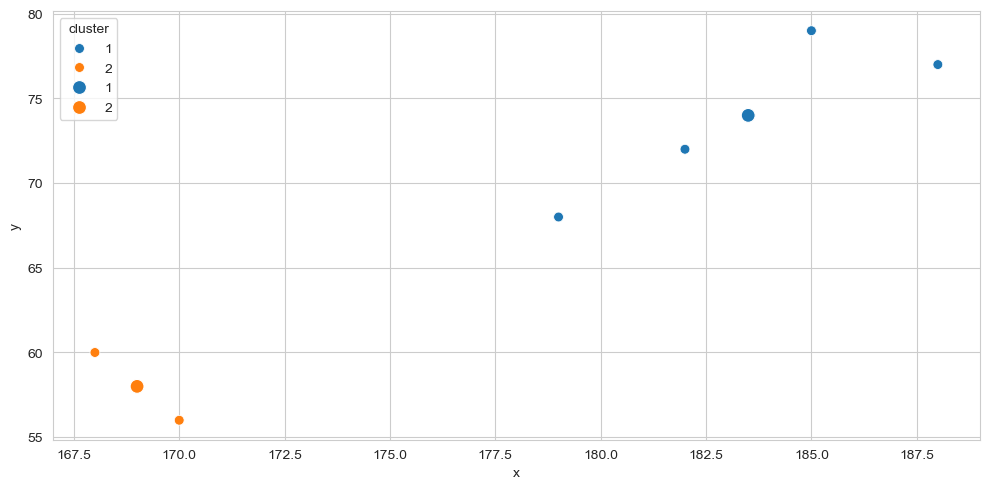

In [76]:
sns.set_style('whitegrid')
fig ,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(x='x',y='y',hue='cluster',palette='tab10',data=customer,s=50,ax=ax)
sns.scatterplot(x='x',y='y',hue='cluster',color='black',data=centroids,s=100,ax=ax)
plt.tight_layout()
plt.show()